# Latent Semantic Analysis (잠재 의미 분석, LSA)

<br>

- 토픽 모델링을 위해 최적화된 알고리즘은 아님.
- 하지만 토픽 모델링 분야에 아이디어를 제공한 알고리즘.
- 후에 나오는 LDA는 LSA의 단점을 개선해 탄생한 알고리즘.

<br>

- BoW에 기반한 DTM이나 TF-IDF는 기본적으로 단어의 빈도수를 이용한 수치화 방법.
    - 단어의 의미를 고려하지 못했음. 토픽을 고려하지 못했다.
- 이를 위한 대안으로 DTML의 잠재된(Latent) 의미를 끌어내는 방법으로 잠재 의미 분석(LSA)이 있음.

<br>

- 선형대수의 특이값분해 SVD를 알고있어야 함.

## Singular Value Decomposition, SVD

<br>

- 특이값 분해? A가 m * n 크기의 행렬일 때, 다음과 같이 **3개의 행렬의 곱으로 A를 분해**하는 것을 의미.

<div align=center>
$A = U \sum V^T$    
</div>

- 이때 각 3개의 행렬은 다음의 조건을 만족.

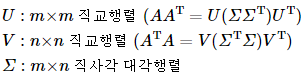

- **SVD로 나온 대각 행렬의 대각 원소 값(대각성분)을 행렬 A의 특이값** 이라고 함.
    - 특이값은 내림차순으로 정렬되어 있음.

## Truncated SVD (절단된 SVD)

<br>

- 앞서 1.1에서 본 SVD를 Full SVD라고 함. 
- LSA의 경우는 full SVD에서 나온 3개의 행렬에서 일부 벡터들을 삭제시킨 절단된 SVD를 사용함.

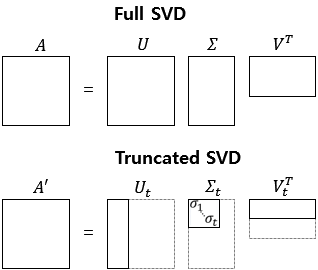

- Truncated SVD는 **대각행렬 $\sum$의 대각원소 값 중 상위 t개만 남게 됨. $U$, $V$ 도 마찬가지로 t열 까지만.**
    - (자명하지만) 값의 손실이 발생. 기존 행렬 A 복구가 불가능.
- 이때 **t는 우리가 찾고자 하는 토픽의 수를 반영한 하이퍼 파라미터.**
    - 크게 잡으면 기존 행렬 A로부터 다양한 의미를 알아낼 수 있음.
    - 작게 잡으면 노이즈 제거가 원활.

<br>

- 일부 벡터를 삭제하므로 차원을 축소하는 것으로도 볼 수있음. 계산비용 절감.
- 또한, **상대적으로 중요하지 않은 정보를 삭제**할 수 있음.
    - 노이즈 제거 == 설명력이 낮은 정보 삭제, 설명력이 높은 정보 유지.
        - 기존 행렬에선 드러나지 않았던 심층적인 의미를 확인할 수 있게 해줌.

## LSA

<br>

- 기존 DTM이나 DTM에 단어의 중요도에 따른 가중치를 줬던 TF-IDF 행렬은 단어의 의미를 전혀 고려하지 못했음.
- LSA는 DTM이나 TF-IDF에 truncated SVD를 적용.
    - 차원 축소, 단어들의 잠재적 의미를 이끌어 냄.
    
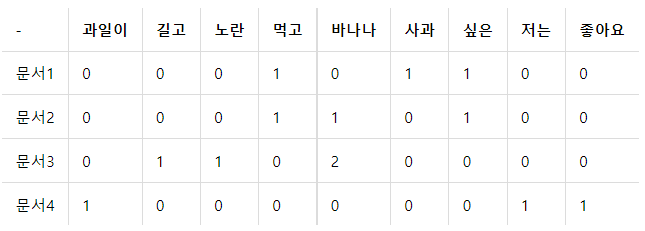

예시를 보자.

In [1]:
# 위 DTM을 Python으로 만들면 다음과 같을 것.
import numpy as np

A = np.array([[0, 0, 0, 1, 0, 1, 1, 0, 0], 
              [0, 0, 0, 1, 1, 0, 1, 0, 0], 
              [0, 1, 1, 0, 2, 0, 0, 0, 0], 
              [1, 0, 0, 0, 0, 0, 0, 1, 1]])

np.shape(A)

(4, 9)

- 4 * 9 크기의 DTM (A) 생성.
- Full SVD를 수행해보자.

In [5]:
U, s, VT = np.linalg.svd(A, full_matrices = True)

In [6]:
U.round(2), np.shape(U)

(array([[-0.24,  0.75,  0.  , -0.62],
        [-0.51,  0.44, -0.  ,  0.74],
        [-0.83, -0.49, -0.  , -0.27],
        [-0.  , -0.  ,  1.  ,  0.  ]]),
 (4, 4))

4 * 4 크기를 갖는 직교행렬 U.

In [7]:
s.round(2), np.shape(s)

(array([2.69, 2.05, 1.73, 0.77]), (4,))

np.linalg.svd는 결과로 대각행렬이 아닌 특이값 리스트를 반환함.  <br>
다시 대각행렬로 바꾸자.

In [8]:
S = np.zeros((4, 9)) # 대각행렬 크기인 4 * 9 크기의 공 행렬 생성
S[:4, :4] = np.diag(s) # 특이값을 대각행렬에 삽입
S.round(2), np.shape(S)

(array([[2.69, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 2.05, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 1.73, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.77, 0.  , 0.  , 0.  , 0.  , 0.  ]]),
 (4, 9))

4 * 9 크기의 대각 행렬 S가 생성됨.  <br>
특이값 또한 내림차순.

In [9]:
VT.round(2), np.shape(VT)

(array([[-0.  , -0.31, -0.31, -0.28, -0.8 , -0.09, -0.28, -0.  , -0.  ],
        [ 0.  , -0.24, -0.24,  0.58, -0.26,  0.37,  0.58, -0.  , -0.  ],
        [ 0.58, -0.  ,  0.  ,  0.  , -0.  ,  0.  , -0.  ,  0.58,  0.58],
        [ 0.  , -0.35, -0.35,  0.16,  0.25, -0.8 ,  0.16, -0.  , -0.  ],
        [-0.  , -0.78, -0.01, -0.2 ,  0.4 ,  0.4 , -0.2 ,  0.  ,  0.  ],
        [-0.29,  0.31, -0.78, -0.24,  0.23,  0.23,  0.01,  0.14,  0.14],
        [-0.29, -0.1 ,  0.26, -0.59, -0.08, -0.08,  0.66,  0.14,  0.14],
        [-0.5 , -0.06,  0.15,  0.24, -0.05, -0.05, -0.19,  0.75, -0.25],
        [-0.5 , -0.06,  0.15,  0.24, -0.05, -0.05, -0.19, -0.25,  0.75]]),
 (9, 9))

9 * 9 크기를 가지는 직교행렬 VT가 생성됨.  <br>
$U \times S \times VT$ 를 하면 기존 행렬 A가 나와야 함.

NumPy의 allclose()는 2개 행렬이 동일하면 True를 return. 동일한지 봐보자.

In [10]:
np.allclose(A, np.dot(np.dot(U, S), VT).round(2))

True

- 이제 t를 정하고 truncated SVD를 진행해보자. 
- t=2

In [12]:
t = 2

S = S[:t, :t]
S.round(2)

array([[2.69, 0.  ],
       [0.  , 2.05]])

상위 2개만 남기고 모두 제거됐음.  <br>
직교행렬 U에 대해서도 2개의 열만 남기고 제거하자.

In [13]:
U = U[:, :t]
U.round(2)

array([[-0.24,  0.75],
       [-0.51,  0.44],
       [-0.83, -0.49],
       [-0.  , -0.  ]])

오른쪽 끝 2개 열이 제거됨.  <br>
VT에 대해 2개의 행만 남기고 제거하자.

In [14]:
VT = VT[:t, :]
VT.round(2)

array([[-0.  , -0.31, -0.31, -0.28, -0.8 , -0.09, -0.28, -0.  , -0.  ],
       [ 0.  , -0.24, -0.24,  0.58, -0.26,  0.37,  0.58, -0.  , -0.  ]])

- 자명한 사실이지만, 축소된 행렬 U, S, VT에 대해 다시 $U \times S \times VT$하면 A와 다른 결과가 나옴.
    - 값이 손실됐음.
- 축소된 행렬을 A_prime이라 하고 A와 비교해보자.

In [15]:
A_prime = np.dot(np.dot(U, S), VT)
A, A_prime.round(2)

(array([[0, 0, 0, 1, 0, 1, 1, 0, 0],
        [0, 0, 0, 1, 1, 0, 1, 0, 0],
        [0, 1, 1, 0, 2, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 1, 1]]),
 array([[ 0.  , -0.17, -0.17,  1.08,  0.12,  0.62,  1.08, -0.  , -0.  ],
        [ 0.  ,  0.2 ,  0.2 ,  0.91,  0.86,  0.45,  0.91,  0.  ,  0.  ],
        [ 0.  ,  0.93,  0.93,  0.03,  2.05, -0.17,  0.03,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.  ,  0.  ,  0.  ,  0.  ]]))

- 축소된 U는 4 * 2 크기. **문서의 개수 * 토픽의 수 t**의 크기.
    - 단어의 개수인 9는 유지되지 않았음
    - 하지만 문서의 개수 4가 유지됨.
    - 4개의 문서를 각각 2개의 값으로 표현.
        - U의 각 행은 잠재 의미를 표현하기 위한 수치화 된 각각의 **문서 벡터**.
- 축소된 VT는 2 * 9 크기. **토픽의 수 t * 단어의 개수** 크기.
    - 문서의 개수 4는 유지되지 않았음.
    - 하지만 단어의 개수 9는 유지됨.
    - 각 단어가 토픽 수 2개로 표현됨.
        - VT의 각 열은 잠재 의미를 표현하기 위한 수치화 된 **단어 벡터**.

## Example

<br>

- sklearn의 Twenty Newsgroups 데이터 (20개의 다른 주제를 가진 뉴스 그룹 데이터) 
- LSA를 통해 문서의 수를 원하는 토픽의 수로 압축한 뒤,
- 각 토픽당 가장 중요한 단어 5개를 출력해보자.

In [16]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))

documents = dataset.data
len(documents)

11314

In [18]:
documents[:2]

["Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n",
 "\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap

- 특수문자가 포함된 다수의 영어문장으로 구성되어 있음.
- sklearn에서 제공한 이 데이터는 target_name에 본래 뉴스그룹 데이터가 어떤 20개의 카테고리를 가졌는지 알려줌.

In [19]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### Text Preprocessing

<br>

- 가능한한 클렌징 작업을 해야함.
    - 알파벳을 제외한 구두점, 숫자, 특수문자 제거 $\Rightarrow$ 정규표현식 통해 가능
    - 길이가 짧은 단어는 유용한 정보가 없다 판단, 짧은 단어 제거.
    - 대문자 $\rightarrow$ 소문자 치환.

In [20]:
news_df = pd.DataFrame({'document':documents})

In [21]:
news_df.head()

,document
0,Well i'm not sure about the story nad it did s...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re..."
2,Although I realize that principle is not one o...
3,Notwithstanding all the legitimate fuss about ...
4,"Well, I will have to change the scoring on my ..."


In [22]:
# 특수문자 제거
# 알파벳이 아닌건 전부 공백으로 치환
news_df['clean_doc'] = news_df['document'].str.replace('[^a-zA-Z]', ' ')

# 길이가 3 이하인 짧은 단어는 제거
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() 
                                                                      if len(w) > 3]))

# 전체 단어를 소문자로 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x : x.lower())

C:\Users\CHEOLH~1\AppData\Local\Temp/ipykernel_11540/3942083153.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  news_df['clean_doc'] = news_df['document'].str.replace('[^a-zA-Z]', ' ')


어떻게 바뀌었는지 다시 확인해보자.

In [27]:
documents[:2], news_df['clean_doc'][0], news_df['clean_doc'][1]

(["Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n",
  "\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little le

대소문자 변환, 특수문자 제거, 길이가 짧은 단어 제거 됐음.  <br>
불용어 제거를 위한 토큰화를 진행하고, 불용어 제거를 하자.

In [28]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) # 공백기준 토큰화
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words]) # 불용어 제거

tokenized_doc[0]

['well',
 'sure',
 'story',
 'seem',
 'biased',
 'disagree',
 'statement',
 'media',
 'ruin',
 'israels',
 'reputation',
 'rediculous',
 'media',
 'israeli',
 'media',
 'world',
 'lived',
 'europe',
 'realize',
 'incidences',
 'described',
 'letter',
 'occured',
 'media',
 'whole',
 'seem',
 'ignore',
 'subsidizing',
 'israels',
 'existance',
 'europeans',
 'least',
 'degree',
 'think',
 'might',
 'reason',
 'report',
 'clearly',
 'atrocities',
 'shame',
 'austria',
 'daily',
 'reports',
 'inhuman',
 'acts',
 'commited',
 'israeli',
 'soldiers',
 'blessing',
 'received',
 'government',
 'makes',
 'holocaust',
 'guilt',
 'away',
 'look',
 'jews',
 'treating',
 'races',
 'power',
 'unfortunate']

### TF-IDF 행렬 생성

<br>

- sklearn의 TfidfVectorizer는 토큰화가 진행되지 않은 텍스트 데이터를 입력으로 사용.
    - 만들기 위해 역토큰화를 한번 진행해보자.

In [29]:
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc
news_df['clean_doc'][0]

'well sure story seem biased disagree statement media ruin israels reputation rediculous media israeli media world lived europe realize incidences described letter occured media whole seem ignore subsidizing israels existance europeans least degree think might reason report clearly atrocities shame austria daily reports inhuman acts commited israeli soldiers blessing received government makes holocaust guilt away look jews treating races power unfortunate'

역토큰화 잘 됐음. TfidfVectorizer를 통해 2,000개 단어에 대한 TF-IDF행렬을 만들어보자.  <br>
모든 단어가 아닌 2000개만.

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words = 'english',
    max_features = 2000, # 상위 2000개 단어 보존
    max_df = 0.5,
    smooth_idf = True # zero division 방지.
)

X = vectorizer.fit_transform(news_df['clean_doc'])
X.shape, X

((11314, 2000),
 <11314x2000 sparse matrix of type '<class 'numpy.float64'>'
 	with 330629 stored elements in Compressed Sparse Row format>)

11314 * 2000 크기의 TF-IDF 행렬이 생성됐음.

### Topic-Modelling

<br>

- TF-IDF 행렬을 여러개로 분할하자. SVD.
- sklearn의 TruncatedSVD를 사용할 수 있음.
    - 기존 데이터가 20개의 카테고리를 가졌으므로, 20개의 토픽이 있다 가정하고 모델링을 할 것.
    - 토픽 숫자는 n_components 인자로 지정이 가능.

In [35]:
from sklearn.decomposition import TruncatedSVD

svd_model = TruncatedSVD(
    n_components = 20,
    algorithm = 'randomized', # SVD 알고리즘. arpack이나 randomized.
    n_iter = 100, # arpack 쓰면 iter쓰면 안됨.
    random_state = 144
)
svd_model.fit(X)

TruncatedSVD(n_components=20, n_iter=100, random_state=144)

In [38]:
# svd_model.components_는 SVD의 VT행렬에 해당.
# 토픽 수 t * 단어 수 크기 일 것.
np.shape(svd_model.components_), svd_model.singular_values_ # 특이값

((20, 2000),
 array([14.54317197,  8.83490403,  7.18350571,  7.00606331,  6.72489174,
         6.46943785,  6.19241503,  6.13182368,  5.99805749,  5.96635028,
         5.77262205,  5.70030666,  5.65496709,  5.59464873,  5.58517874,
         5.38155555,  5.30728027,  5.24098698,  5.20635186,  5.15400323]))

20개 행의 각 2,000개 열 중 가장 값이 큰 5개 값을 찾아 출력해보자.

In [39]:
terms = vectorizer.get_feature_names() # 단어집합 load. 2000개 단어.

def get_topics(components, feature_names, n=5):
    for index, topic in enumerate(components):
        print('Topic %d: ' % (index+1), [(feature_names[i], topic[i].round(3)) 
                                          for i in topic.argsort()[:-n - 1:-1]])
get_topics(svd_model.components_, terms)

Topic 1:  [('like', 0.202), ('know', 0.191), ('people', 0.18), ('think', 0.168), ('good', 0.14)]
Topic 2:  [('thanks', 0.311), ('windows', 0.286), ('card', 0.187), ('drive', 0.175), ('mail', 0.144)]
Topic 3:  [('game', 0.324), ('team', 0.281), ('year', 0.264), ('games', 0.236), ('drive', 0.185)]
Topic 4:  [('drive', 0.541), ('scsi', 0.241), ('hard', 0.154), ('drives', 0.153), ('disk', 0.15)]
Topic 5:  [('thanks', 0.455), ('drive', 0.235), ('know', 0.202), ('mail', 0.193), ('advance', 0.138)]
Topic 6:  [('chip', 0.222), ('government', 0.178), ('encryption', 0.17), ('clipper', 0.161), ('space', 0.156)]
Topic 7:  [('like', 0.419), ('card', 0.253), ('know', 0.252), ('bike', 0.133), ('video', 0.12)]
Topic 8:  [('card', 0.458), ('video', 0.217), ('sale', 0.188), ('jesus', 0.148), ('monitor', 0.141)]
Topic 9:  [('like', 0.272), ('sale', 0.206), ('good', 0.151), ('offer', 0.144), ('jesus', 0.141)]
Topic 10:  [('pitt', 0.383), ('gordon', 0.372), ('surrender', 0.368), ('skepticism', 0.362), ('ba

그렇게 의미있는 토픽은 아닌것 같다.

## LSA의 장단점

<br>

- 쉽고 빠른 구현이 가능, 단어의 잠재적 의미를 이끌어 낼 수 있음.
    - 문서의 유사도 계산 등에서 좋은 성능.
- 하지만 SVD 특성상 이미 계산된 LSA에 새로운 데이터를 추가해 계산하려고 하면 처음부터 다시 해야함.
    - 새로운 정보에 대한 업데이트가 어려움.
    - 그래서 단어의 의미를 벡터화 하는 Word2Vec이 인기있음.